# Table Comparison T0 v T1
Collab Theis - Hebrok labs

Data analysis: Alexander Fastner

based on Data analysis by: Sara Jimenez

Data generation: Veronica Cochrane

## Loading Packages

In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
import anndata as ad
from anndata import AnnData

## Load Data

In [2]:
# Read raw data and process it
adata = pd.read_csv('../data/MAFA_WT_gene_count.txt', index_col=20, sep='\t').T
adata

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,MT-ND5,TTR,MT-CO2,MT-CYB,...,RNA5-8SN4,AL354822.1,AC023491.2,RF00003,RF01972,RF01973,RF01974,AC233755.2,AC233755.1,AC213203.1
MAFAWT_001,769950,469036,398234,164748,186078,116719,151341,178909,133640,121061,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_002,760265,204988,207026,146662,80616,98010,70795,109150,55131,49581,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_003,672585,522418,378290,146501,243656,93180,195788,131732,163870,158054,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_004,820162,262856,502891,171062,117809,132909,97752,150350,79653,75222,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_005,878886,335731,73413,123677,122960,127821,102340,30019,96654,85530,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_006,878745,350758,114376,147449,134333,125976,105483,31916,99623,94874,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_007,1129979,359712,159369,65313,156749,104854,156351,25998,108889,113709,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_008,1017468,285966,157747,109003,111200,119484,89777,32111,89609,81167,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_009,800671,176313,194431,139982,64275,101077,52585,53031,49169,39752,...,0,0,0,0,0,0,0,0,0,0
MAFAWT_010,633710,177343,219577,113536,73264,76057,64194,57478,50504,46106,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Transform to AnnData object
adata = AnnData(adata, dtype=np.float32)
adata.var_names_make_unique()
adata

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 20 × 58735

In [4]:
# Read metadata 
metadata = pd.read_csv('../data/2023_MAFA_MetaData.txt', index_col=0, sep='\t')
metadata

,Sample_Description,Treatment,Genotype,TimePoint,Batch,DOX,GroupName
SampleID,,,,,,,
MAFAWT_001,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_002,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_003,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_004,MAFAWT,MAFA,WT,T0,1,N,MAFA_WT_T0
MAFAWT_005,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_006,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_007,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_008,MAFAWT,MAFA,WT,T2,1,Y,MAFA_WT_T2
MAFAWT_009,MAFAWT,MAFA,WT,T1,1,Y,MAFA_WT_T1


In [5]:
adata.obs['condition'] = metadata['Treatment']
adata.obs['time_point'] = metadata['TimePoint']
adata.obs['DOX'] = metadata['DOX']
adata.obs

,condition,time_point,DOX
MAFAWT_001,MAFA,T0,N
MAFAWT_002,MAFA,T0,N
MAFAWT_003,MAFA,T0,N
MAFAWT_004,MAFA,T0,N
MAFAWT_005,MAFA,T2,Y
MAFAWT_006,MAFA,T2,Y
MAFAWT_007,MAFA,T2,Y
MAFAWT_008,MAFA,T2,Y
MAFAWT_009,MAFA,T1,Y
MAFAWT_010,MAFA,T1,Y


In [6]:
# split data set by timepoint
subset_t0 = adata[adata.obs.time_point == 'T0']
subset_t1 = adata[adata.obs.time_point == 'T1']
#split by condition to remove control
subset_t0 = subset_t0[subset_t0.obs.condition == "MAFA"]
#rename T0 to control
subset_t0.obs.condition = "Control"

subset_t1 = subset_t1[subset_t1.obs.condition == "MAFA"]
#combine
adata = ad.concat([subset_t0, subset_t1], axis = 0)

adata.obs

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/pandas/core/generic.py:6234: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self[name] = value


,condition,time_point,DOX
MAFAWT_001,Control,T0,N
MAFAWT_002,Control,T0,N
MAFAWT_003,Control,T0,N
MAFAWT_004,Control,T0,N
MAFAWT_009,MAFA,T1,Y
MAFAWT_010,MAFA,T1,Y
MAFAWT_011,MAFA,T1,Y


## Quality Control

In [7]:
#check various filter points
# dc.plot_filter_by_expr(subset_t0, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)
# dc.plot_filter_by_expr(subset_t1, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)
# dc.plot_filter_by_expr(adata, group=None, min_count=5, min_total_count=30, large_n=10, min_prop=0.75)

In [8]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(adata, group=None, min_count=10, min_total_count=15, large_n=1, min_prop=1)
genes.size

15375

In [9]:
# Filter by these genes
adata = adata[:, genes].copy()
adata

AnnData object with n_obs × n_vars = 7 × 15375
    obs: 'condition', 'time_point', 'DOX'

In [10]:
#!pip install pydeseq2

In [11]:
# Import DESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [12]:
adata.X = np.round(adata.X,0)

In [13]:
# Build DESeq2 object
dds = DeseqDataSet(
    adata=adata,
    design_factors='condition',
    refit_cooks=True,
    n_cpus=8,
)

In [14]:
# Compute LFCs
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 19.40 seconds.

Fitting dispersion trend curve...
... done in 4.00 seconds.

Fitting MAP dispersions...
... done in 21.25 seconds.

Fitting LFCs...
... done in 1.91 seconds.

Refitting 0 outliers.



In [15]:
# Extract contrast 
stat_res = DeseqStats(dds, contrast=['condition', 'MAFA', 'Control'], n_cpus=8)

In [16]:
# Compute Wald test
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition MAFA vs Control


... done in 0.94 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,736138.312500,0.093507,0.144055,0.649106,0.516270,0.720332
MT-CO1,290397.343750,-0.628956,0.377602,-1.665656,0.095782,0.252893
GCG,310534.500000,-0.385923,0.295161,-1.307499,0.191043,0.400898
INS,136343.203125,-0.306777,0.232938,-1.316993,0.187841,0.396387
MT-ND4,121587.226562,-0.738917,0.411370,-1.796235,0.072457,0.207934
...,...,...,...,...,...,...
LIPE-AS1,14.585292,-0.299753,0.471245,-0.636088,0.524719,0.727237
CORT,11.667504,-0.035185,0.326604,-0.107731,0.914209,0.960446
AL451074.2,12.934265,0.202498,0.483017,0.419235,0.675044,0.828963


In [17]:
# Shrink LFCs
stat_res.lfc_shrink(coeff='condition_MAFA_vs_Control')

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition MAFA vs Control


... done in 4.00 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,736138.312500,2.110556,0.186601,0.649106,0.516270,0.720332
MT-CO1,290397.343750,1.857769,0.461581,-1.665656,0.095782,0.252893
GCG,310534.500000,2.596455,0.446264,-1.307499,0.191043,0.400898
INS,136343.203125,-0.729325,0.234172,-1.316993,0.187841,0.396387
MT-ND4,121587.226562,1.059381,0.590722,-1.796235,0.072457,0.207934
...,...,...,...,...,...,...
LIPE-AS1,14.585292,-0.083979,0.301697,-0.636088,0.524719,0.727237
CORT,11.667504,-0.144270,0.406413,-0.107731,0.914209,0.960446
AL451074.2,12.934265,0.054207,0.304773,0.419235,0.675044,0.828963


In [18]:
# Extract results
results_df = stat_res.results_df
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CHGA,736138.312500,2.110556,0.186601,0.649106,0.516270,0.720332
MT-CO1,290397.343750,1.857769,0.461581,-1.665656,0.095782,0.252893
GCG,310534.500000,2.596455,0.446264,-1.307499,0.191043,0.400898
INS,136343.203125,-0.729325,0.234172,-1.316993,0.187841,0.396387
MT-ND4,121587.226562,1.059381,0.590722,-1.796235,0.072457,0.207934
...,...,...,...,...,...,...
LIPE-AS1,14.585292,-0.083979,0.301697,-0.636088,0.524719,0.727237
CORT,11.667504,-0.144270,0.406413,-0.107731,0.914209,0.960446
AL451074.2,12.934265,0.054207,0.304773,0.419235,0.675044,0.828963


In [19]:
#!pip install adjustText

In [20]:
#get the table of the top 20 pvalues from results_df
top_20_pvalues = results_df.sort_values('log2FoldChange', ascending=False).head(20)
top_20_pvalues

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
CDH7,434.641296,5.373642,0.173170,31.033208,1.922398e-211,2.955303e-207
MAFA,8003.367188,5.225458,0.577766,9.133992,6.601880e-20,5.204652e-18
LYPD1,1406.694458,4.418554,0.234355,18.947121,4.664109e-80,5.975113e-77
MEGF6,775.839722,4.327429,0.279840,15.594966,7.876504e-55,4.484648e-52
PHACTR1,852.280396,3.944534,0.170355,23.253908,1.298756e-119,3.327630e-116
CDHR1,1506.013306,3.721452,0.240916,15.583625,9.406622e-55,5.164571e-52
TRAF5,184.697540,3.683201,0.203838,18.150694,1.267896e-73,1.299424e-70
GFRA3,354.002045,3.616187,0.330751,11.136202,8.360961e-29,1.530155e-26
ELOVL2,639.725281,3.420618,0.134955,25.428281,1.227713e-142,3.774726e-139


(0.0, 300.0)

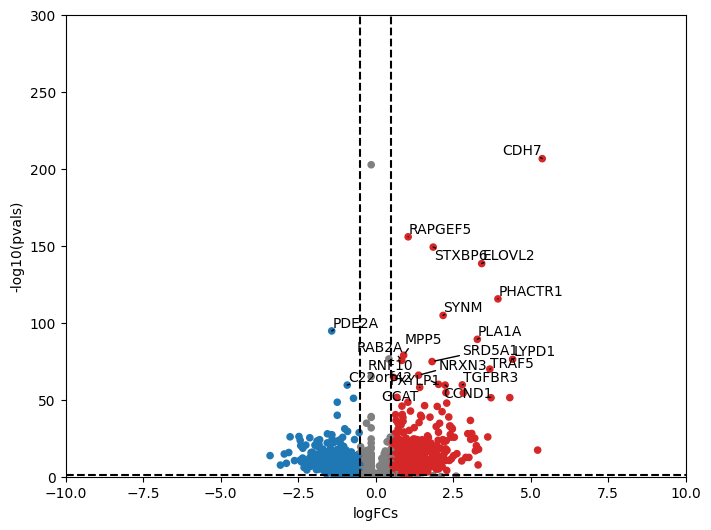

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=20,
    ax=ax
)
ax.set_xlim(-10, 10)
ax.set_ylim(0, 300)
#plt.savefig('../figures/direct/WT_T0_T1/volcano.png')

In [22]:
mat = results_df[['stat']].T.rename(index={'stat': 'treatment.vs.control'})
mat

gene_name,CHGA,MT-CO1,GCG,INS,MT-ND4,EEF1A1,MT-ND5,TTR,MT-CO2,MT-CYB,...,Z74021.1,ZNF506,AC008537.2,AC138207.5,FAM183A,LIPE-AS1,CORT,AL451074.2,BX322234.1,CNGA1
treatment.vs.control,0.649106,-1.665656,-1.307499,-1.316993,-1.796235,-0.217251,-1.712173,-6.911365,-1.978241,-1.664138,...,-0.180012,1.118903,-0.283177,-0.336797,0.471276,-0.636088,-0.107731,0.419235,0.379273,0.896918


### Transcription factor activity inference

In [23]:
collectri = dc.get_collectri(organism='human')
collectri

/root/anaconda3/envs/decoupler/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


### Activity inference with Univariate Linear Model (ULM)

In [24]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
#make copy to make table from
table_tf_acts = tf_acts
table_tf_pvals = tf_pvals
table_tf_acts = table_tf_acts.rename(index={"treatment.vs.control": "TF_Activity"})
table_tf_pvals = table_tf_pvals.rename(index={"treatment.vs.control": "TF_pvalue"})
new_table = pd.concat([table_tf_acts, table_tf_pvals], axis = 0).T
#actual df
tf_acts

Running ulm on mat with 1 samples and 15375 targets for 643 sources.


,ABL1,AHR,AHRR,AIRE,AP1,APEX1,AR,ARID1A,ARID3A,ARID3B,...,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF395,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91
treatment.vs.control,-0.921789,-2.360325,-0.596019,-1.681218,-0.588412,-0.130491,0.571616,-0.092673,-0.641494,-0.13138,...,-1.080633,-0.693065,-0.592381,-4.944431,0.101146,0.634233,-2.358276,0.17905,-1.013913,-2.140976


# Filter new Table by the LFC and adjpvalue from DE table above

In [25]:
#Not all TF are in the list?
selected_rows = results_df.loc[[idx for idx in new_table.index if idx in results_df.index]]
selected_rows

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
ABL1,3572.048584,-0.149765,0.103874,-1.656173,0.097687,0.256226
AHR,2046.126099,-0.331159,0.279640,-1.845780,0.064924,0.193614
AHRR,231.301956,-0.053971,0.295256,-0.414137,0.678773,0.831656
APEX1,2973.051270,0.032695,0.112722,0.330969,0.740668,0.869031
AR,79.219101,-0.156574,0.198744,-1.073955,0.282843,0.514086
...,...,...,...,...,...,...
ZNF395,698.493042,-0.867812,0.365126,-3.195661,0.001395,0.009065
ZNF436,321.682892,-0.008501,0.137009,-0.073968,0.941036,0.971953
ZNF699,102.245224,-0.005042,0.177472,-0.038543,0.969255,0.985995


In [26]:
# make selectable for various threshold values
Threshold_LFC = 0.5
Threshold_padj = 0.05
subset_lfc = selected_rows[abs(selected_rows["log2FoldChange"]) > Threshold_LFC]
subset_padj = subset_lfc[abs(subset_lfc["padj"]) < Threshold_padj]
subset_padj

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,
ARID5B,350.136169,-0.907567,0.250770,-4.179931,2.915979e-05,3.145649e-04
ASCL1,549.898743,-1.329544,0.256346,-5.648847,1.615276e-08,3.224888e-07
ATF3,197.561661,-1.119760,0.379830,-3.694287,2.205046e-04,1.869728e-03
CDX2,423.922882,0.528793,0.196815,3.173632,1.505443e-03,9.687393e-03
CEBPA,614.659973,-0.603596,0.125844,-5.118754,3.075613e-07,4.940585e-06
...,...,...,...,...,...,...
YBX3,381.235443,0.580992,0.102299,5.933258,2.969821e-09,6.664973e-08
ZBTB16,107.884071,-1.145761,0.261688,-4.888929,1.013858e-06,1.468996e-05
ZBTB17,816.272522,0.843230,0.121740,7.189270,6.513875e-13,2.312651e-11


In [27]:
#get TF data too
tf_data = new_table.loc[subset_padj.index]
tf_data
#merge into 1 for readability
complete_table = pd.merge(tf_data, subset_padj, left_index=True, right_index=True)
complete_table
#save
#complete_table.to_csv('../figures/direct/WT_T0_T1/table_comparison_WT_01.csv')

,TF_Activity,TF_pvalue,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_name,,,,,,,,
ARID5B,-2.240451,0.025076,350.136169,-0.907567,0.250770,-4.179931,2.915979e-05,3.145649e-04
ASCL1,-2.827205,0.004702,549.898743,-1.329544,0.256346,-5.648847,1.615276e-08,3.224888e-07
ATF3,0.898461,0.368954,197.561661,-1.119760,0.379830,-3.694287,2.205046e-04,1.869728e-03
CDX2,-0.811078,0.417334,423.922882,0.528793,0.196815,3.173632,1.505443e-03,9.687393e-03
CEBPA,-1.246057,0.212762,614.659973,-0.603596,0.125844,-5.118754,3.075613e-07,4.940585e-06
...,...,...,...,...,...,...,...,...
YBX3,2.834486,0.004596,381.235443,0.580992,0.102299,5.933258,2.969821e-09,6.664973e-08
ZBTB16,-1.275105,0.202291,107.884071,-1.145761,0.261688,-4.888929,1.013858e-06,1.468996e-05
ZBTB17,1.581443,0.113797,816.272522,0.843230,0.121740,7.189270,6.513875e-13,2.312651e-11


# TF plots

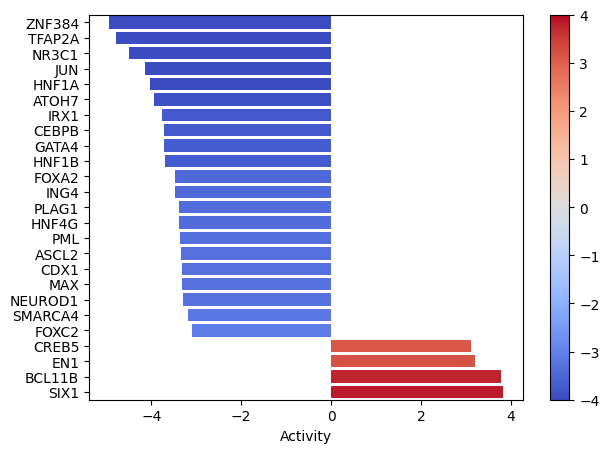

In [28]:
dc.plot_barplot(
    tf_acts,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=4,
    vmax=4,
    #save='../figures/direct/WT_T0_T1/tf_activities.png'
)

In [29]:
abs_values = tf_acts.abs()
sorted_df = abs_values.sum(axis=0).sort_values(ascending=False)
top_25 = sorted_df.head(25).index
subset_df = tf_acts[top_25]
long_df = subset_df.reset_index().melt(var_name='TFs', value_name='value')
long_df = long_df[long_df.index != 0]
long_df.to_csv('../figures/direct/WT_T0_T1/top25_tfs.csv')
long_df

,TFs,value
1,ZNF384,-4.944431
2,TFAP2A,-4.793782
3,NR3C1,-4.498563
4,JUN,-4.131877
5,HNF1A,-4.017891
6,ATOH7,-3.933676
7,SIX1,3.833234
8,BCL11B,3.772531
9,IRX1,-3.760674
10,CEBPB,-3.720316


In [30]:
# dc.plot_targets(results_df, stat='stat', source_name='PREB', net=collectri, top=15,#save='../figures/direct/WT_T0_T1/SIX1_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='GLIS3', net=collectri, top=15,#save='../figures/direct/WT_T0_T1/BCL11B_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='MAFA', net=collectri, top=15,#save='../figures/direct/WT_T0_T1/MAFA_targets.png')
#

# Plot Networks

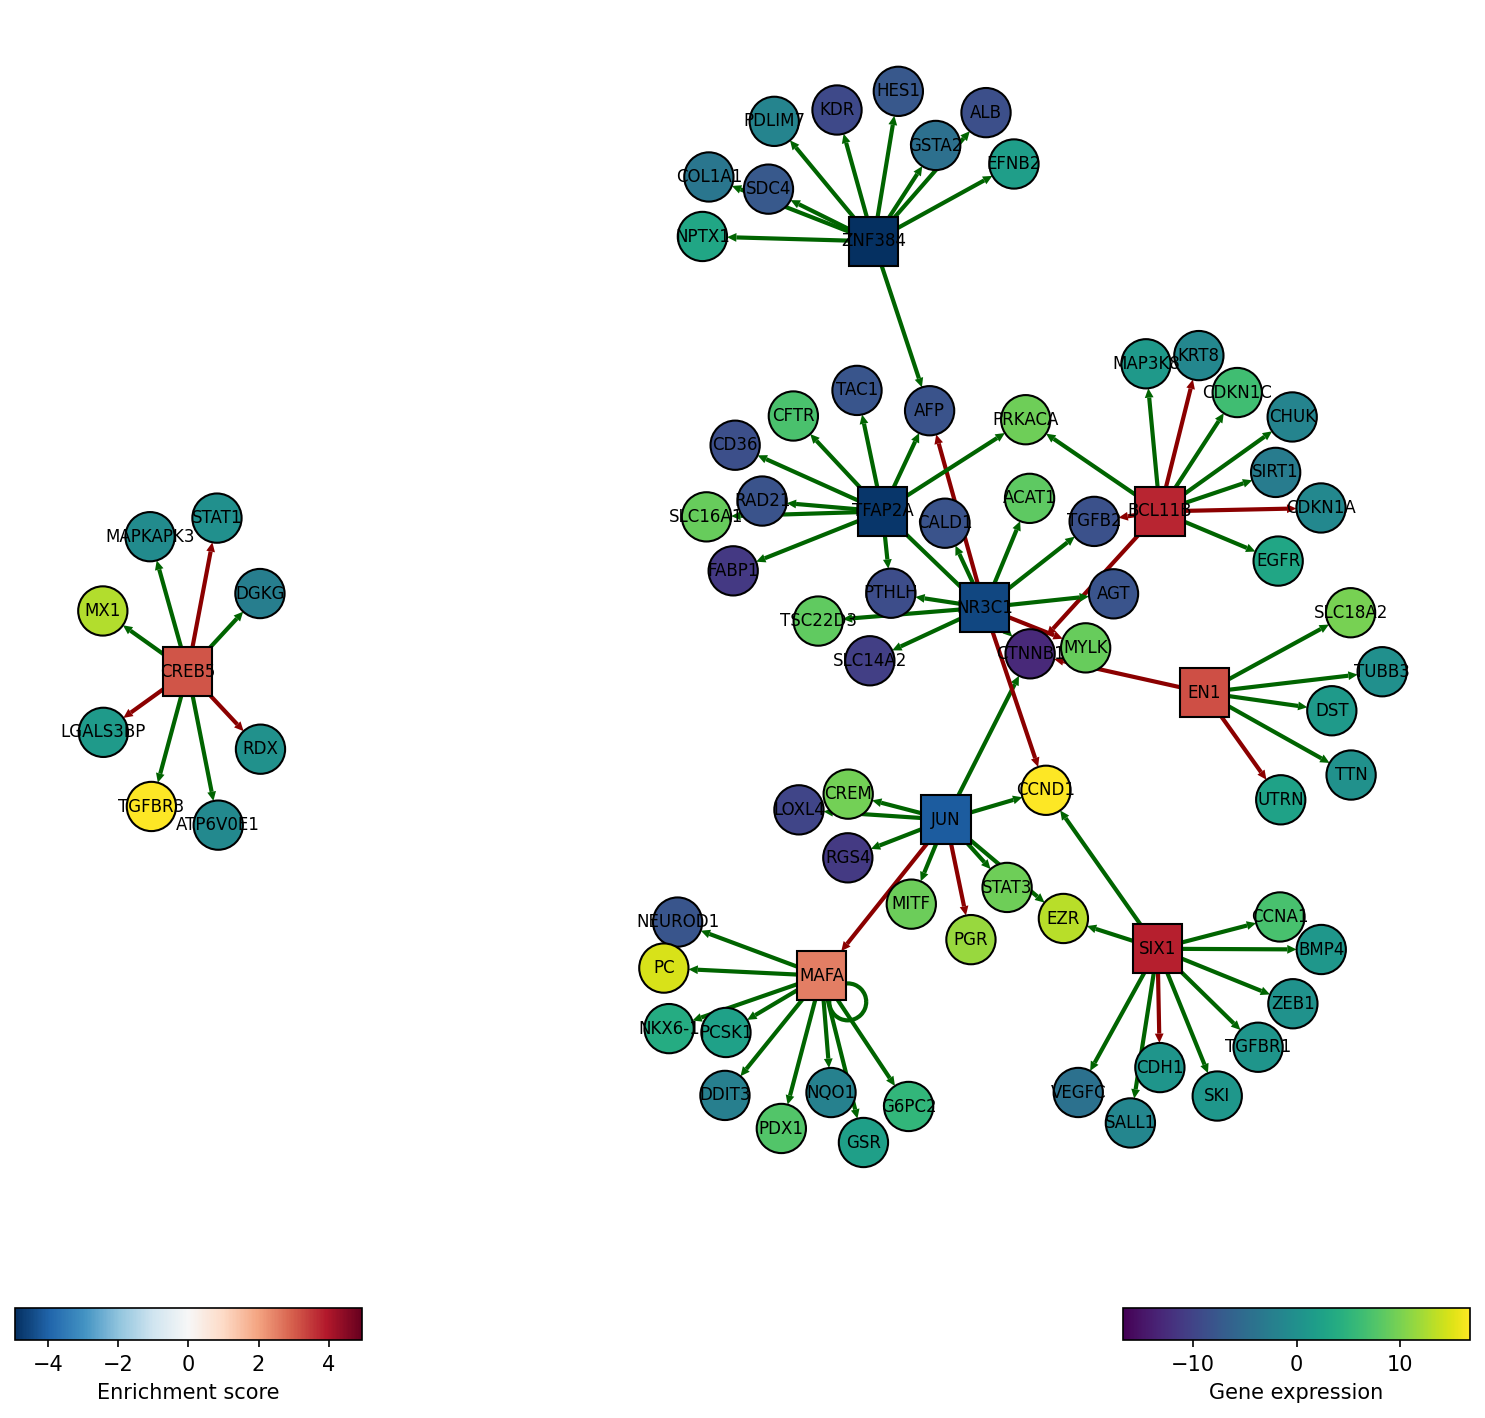

In [31]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=['SIX1', 'BCL11B', 'EN1', 'CREB5', 'ZNF384', 'TFAP2A', 'NR3C1', 'JUN', 'MAFA'],
    n_targets=10,
    node_size=0.5,
    label_size=8,
    figsize=(10, 10),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    #save = '../figures/direct/WT_T0_T1/plot_networks.png'
)

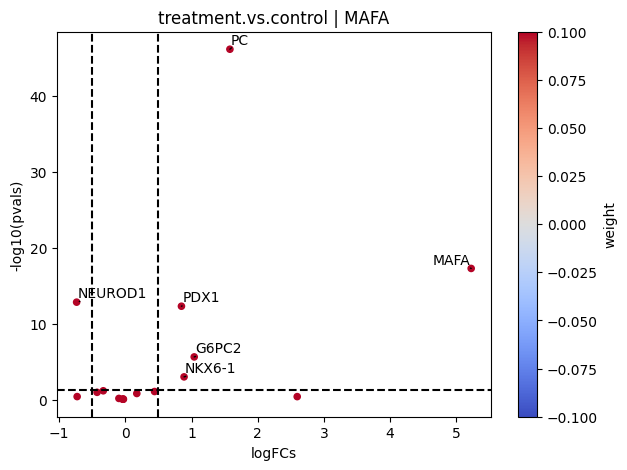

In [32]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': 'treatment.vs.control'})
pvals = results_df[['padj']].T.rename(index={'padj': 'treatment.vs.control'})

# Plot
dc.plot_volcano(logFCs, pvals, 'treatment.vs.control', name='MAFA', net=collectri, top=10, sign_thr=0.05, lFCs_thr=0.5)

### Pathway activity inference

In [33]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


### Activity inference with multivariate Linear Model (MLM)

In [34]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts

Running mlm on mat with 1 samples and 15375 targets for 14 sources.


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
treatment.vs.control,0.534618,-1.675549,-0.695236,1.463303,-1.224709,1.949202,-1.291368,1.450633,-1.424732,-0.627537,-0.704875,0.141006,-0.220663,0.886448


In [35]:
abs_values = pathway_acts.abs()
sorted_df = abs_values.sum(axis=0).sort_values(ascending=False)
top_25 = sorted_df.head(25).index
subset_df = pathway_acts[top_25]
long_df = subset_df.reset_index().melt(var_name='Pathways', value_name='value')
long_df = long_df[long_df.index != 0]
long_df.to_csv('../figures/direct/WT_T0_T1/top25_pathways.csv')
long_df

,Pathways,value
1,MAPK,1.949202
2,EGFR,-1.675549
3,Hypoxia,1.463303
4,PI3K,1.450633
5,TGFb,-1.424732
6,NFkB,-1.291368
7,JAK-STAT,-1.224709
8,p53,0.886448
9,Trail,-0.704875
10,Estrogen,-0.695236


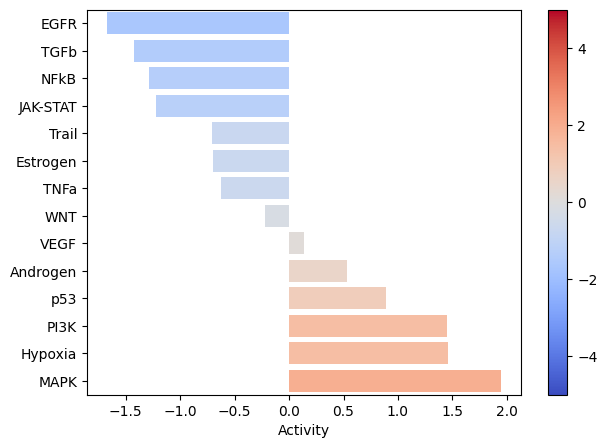

In [36]:
dc.plot_barplot(
    pathway_acts,
    'treatment.vs.control',
    top=25,
    vertical=True,
    vmin=-5,
    vmax=5,
    #save='../figures/direct/WT_T0_T1/pathway_activities.png'
)

In [37]:
# dc.plot_targets(results_df, stat='stat', source_name='p53', net=progeny, top=30,#save='../figures/direct/WT_T0_T1/p53_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='Androgen', net=progeny, top=20,#save='../figures/direct/WT_T0_T1/Androgen_targets.png')
# dc.plot_targets(results_df, stat='stat', source_name='JAK-STAT', net=progeny, top=20, #save='../figures/direct/WT_T0_T1/JAK-STAT_targets.png')

# Approach to investigate p53 -> PPI -> mechanism? -> ask -> Table with list of targets for each one of the pathways with statistics 

### Funtional enrichment of Biological Terms

In [ ]:
# The Molecular Signatures Database (MSigDB) is a resource containing a collection of gene sets annotated to different biological processes.
msigdb = dc.get_resource('MSigDB')
msigdb

In [ ]:
msigdb['collection'].unique()

In [ ]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

msigdb